Tema 2 AI
Ilie Andrei-Leonard

Initializam libraries

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [135]:
DATASET_TYPE = "simple" # simple, complex

Functii pentru generarea de datasets

In [136]:
def generate_examples(dataset_type = "simple", n_samples = 500, n_features = 1, noise = 20):
    if dataset_type == "simple":
        X, t = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)
        # fig = plt.figure(figsize=(4, 4))
        # plt.xlabel("x (feature)")
        # plt.ylabel("y (output)")
        # plt.title("Synthetic data set")
        # plt.scatter(X, y)
        # plt.show()
        return X, t
    
    elif dataset_type == "complex":
        n_samples = 300
        x = np.linspace(-10, 10, n_samples) # coordinates
        noise_sample = np.random.normal(0,0.5,n_samples)
        sine_wave = x + np.sin(4*x) + noise_sample
        plt.plot(x, sine_wave, 'o')
        plt.show()
        return x, sine_wave
    else:
        raise ValueError("Unknown dataset type: " + dataset_type)

Clasa pentru LinearRegression

In [137]:
class LinearRegression(object):
    """
    Modelul de Regresie Liniara
    y = X @ w 
        - valoarea prezisă de model
    t ~ N(t|X @ w, var) 
        - valorile de antrenare (target) sunt fac parte dintr-o distributie normala in jurul mean-ului X@w, 
          la care se adauga zgomot dat de varianta `var`
    """

    def fit(self, X, t):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting)
        Parameterii
        ----------
        X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """
        # TODO codul vostru aici: calculati vectorul de ponderi w
        # print(X.shape)
        N, D = X.shape
        
        # ar trebui facut cu np.dot sau cu @
        self.w = np.linalg.pinv(X) @ t
        # print(self.w)
        # end 
        
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X, return_std=False):
        """
        Intoarce valoari prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se doreste predictia valorii conform modelului
        return_std : bool, optional
            intoarce deviatia standard a fiecarei valori prezice, daca e setat pe True
        
        Intoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviatia standard a fiecarei valori prezise
        """
        # TODO codul vostru aici: calculati valoarea prezisa de modelul vostru
        N, D = X.shape
        y = np.zeros(N)

        y = X @ self.w
        # end codul vostru aici
        
        if return_std:
            # TODO codul vostru aici: intoarceti un vector de aceeasi dimensiune cu y, care 
            # are in fiecare pozitie o valoare egala cu deviatia standard a modelului antrenat (i.e. sqrt(var))
            y_std = np.ones_like(y) * math.sqrt(self.var)

            # aplic sqrt(var) pe toti y
            return y, y_std
        return y

In [138]:
def extract_polynomial_features(X, M):
    phi = X
    # TODO codul vostru aici: intoarceti valorile phi_n astfel incat pentru fiecare 
    # intrare x phi_n = [1, x, x^2, ..., x^M]
    phi_n = np.zeros((X.size, M+1))

    for i in range(X.size):
        current = np.zeros(M+1)

        for j in range(M+1):
            current[j] = X[i][0] ** j

        phi_n[i] = current
        # print(X[i][0], i)

    phi = phi_n


    # end
    
    # nota: phi trebuie sa fie la final un np.array de dimensiune (N, M+1), unde N este numarul de linii din X
    return phi


In [139]:
# Functia de eroare conform PDF
def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))

Testare intermediara

In [140]:
# Generam datele de test si train
# Folosind proportia 20/80 
X, t = generate_examples(dataset_type="simple")
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)

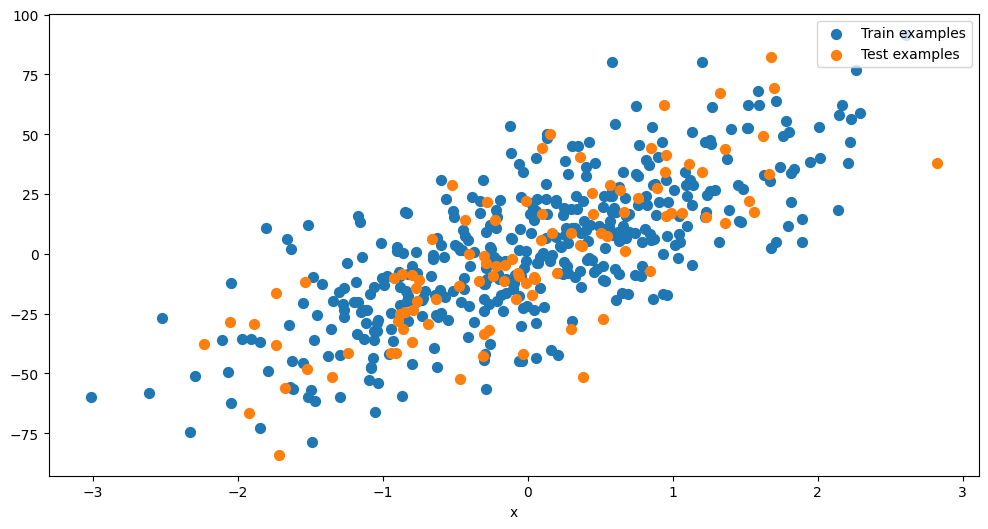

In [141]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, t_train, s=50, label="Train examples")
plt.scatter(X_test, t_test, s=50, label="Test examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

In [142]:
# creati un model liniar
# model = ...
model = LinearRegression()

# Folositi functia extract_polynomial_features pentru a introduce termenul de bias in matricile X_train si X_test
X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

# antrenati modelul vostru
model.fit(X_train_feat, t_train)

# obtineti predictia pe setul de antrenare si pe setul de test
y_train = model.predict(X_train_feat) 
y_train = np.zeros(X_train.size)
y_test = np.zeros(X_test.size)
y_test_std = np.zeros(X_test.size)
y_test, y_test_std = model.predict(X_test_feat, True)

# Sortam
sorted_stuffs = list(zip(*sorted(zip(X_test,y_test))))
X_test_sorted = sorted_stuffs[0]
y_test_sorted = sorted_stuffs[1]

In [146]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

Train error: 887.3513342799077
Test  error: 431.9017885793346


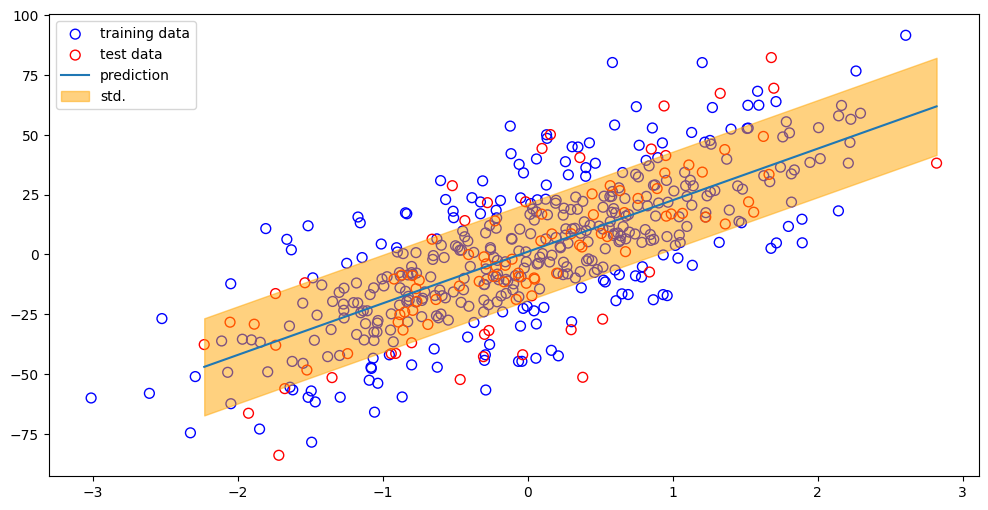

In [144]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, t_train, facecolor="none", color="b", s=50, label="training data")
plt.scatter(X_test, t_test, facecolor="none", color="r", s=50, label="test data")
plt.plot(X_test_sorted, y_test_sorted, label="prediction")
plt.fill_between(
    np.squeeze(X_test_sorted), y_test_sorted - y_test_std, y_test_sorted + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()